In [7]:
import os
import pandas as pd

# Paths for images and labels
base_path = "/Users/jasmufin/Downloads/Aero-engine_defect-detect_new"
train_images_path = os.path.join(base_path, "images", "train")
train_labels_path = os.path.join(base_path, "labels", "train")

# List image files
train_image_files = [f for f in os.listdir(train_images_path) if f.endswith('.jpg')]

# Create a DataFrame to store data
data = []

# Populate the DataFrame with image and label information
for image_file in train_image_files:
    image_path = os.path.join(train_images_path, image_file)
    label_file = image_file.replace('.jpg', '.txt')
    label_path = os.path.join(train_labels_path, label_file)
    
    # Determine label class
    label_class = 'Not available'
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            label_content = f.read().strip()
            if any(cls_id in label_content.split()[0] for cls_id in ["1", "2", "3"]):
                label_class = 'Defect'
            else:
                label_class = 'No Defect'
    
    # Append data to the DataFrame
    data.append({'Image File': image_file, 'Label File': label_file, 'Label Class': label_class})

# Create DataFrame
df = pd.DataFrame(data)

# Convert DataFrame to HTML table
html_table = df.to_html(index=False, classes=['table', 'table-striped'], justify='left')

# Display HTML table in Jupyter Notebook
from IPython.display import HTML, display
display(HTML(html_table))




Image File,Label File,Label Class
24_flip0.jpg,24_flip0.txt,Defect
2023-04-06 19-35-43-684.jpg,2023-04-06 19-35-43-684.txt,No Defect
10_flip.jpg,10_flip.txt,Defect
6_rot1.jpg,6_rot1.txt,No Defect
7_rot1.jpg,7_rot1.txt,Defect
11_flip.jpg,11_flip.txt,Defect
15_rot2.jpg,15_rot2.txt,No Defect
14_rot2.jpg,14_rot2.txt,Defect
2023-04-06 19-31-09-690.jpg,2023-04-06 19-31-09-690.txt,Defect
8_flip.jpg,8_flip.txt,Defect


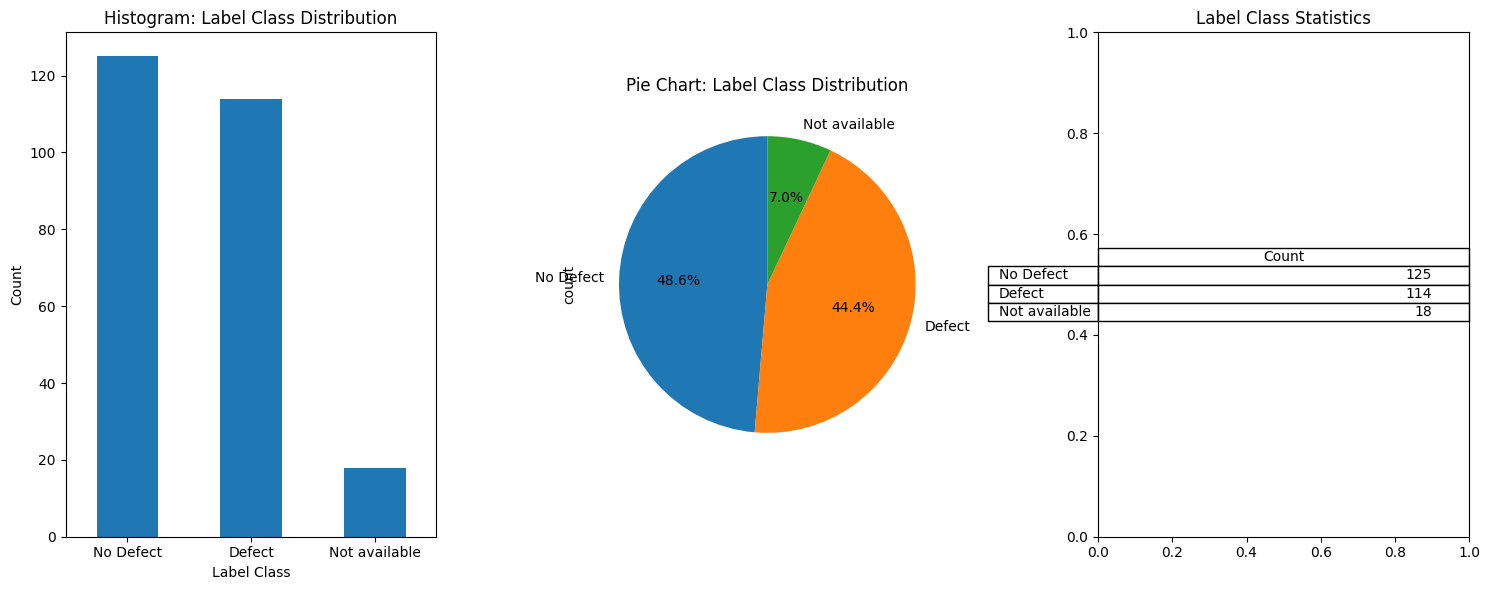

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Paths for images and labels
base_path = "/Users/jasmufin/Downloads/Aero-engine_defect-detect_new"
train_images_path = os.path.join(base_path, "images", "train")
train_labels_path = os.path.join(base_path, "labels", "train")

# List image files
train_image_files = [f for f in os.listdir(train_images_path) if f.endswith('.jpg')]

# Create a DataFrame to store data
data = []

# Populate the DataFrame with image and label information
for image_file in train_image_files:
    image_path = os.path.join(train_images_path, image_file)
    label_file = image_file.replace('.jpg', '.txt')
    label_path = os.path.join(train_labels_path, label_file)
    
    # Determine label class
    label_class = 'Not available'
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            label_content = f.read().strip()
            if any(cls_id in label_content.split()[0] for cls_id in ["1", "2", "3"]):
                label_class = 'Defect'
            else:
                label_class = 'No Defect'
    
    # Append data to the DataFrame
    data.append({'Image File': image_file, 'Label File': label_file, 'Label Class': label_class})

# Create DataFrame
df = pd.DataFrame(data)

# Count occurrences of each label class
label_counts = df['Label Class'].value_counts()

# Plotting
plt.figure(figsize=(15, 6))

# Histogram (Bar plot)
plt.subplot(1, 3, 1)
label_counts.plot(kind='bar', rot=0)
plt.title('Histogram: Label Class Distribution')
plt.xlabel('Label Class')
plt.ylabel('Count')

# Pie chart
plt.subplot(1, 3, 2)
label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart: Label Class Distribution')

# Table for statistics
plt.subplot(1, 3, 3)
plt.table(cellText=label_counts.values.reshape(-1, 1),
          colLabels=['Count'],
          rowLabels=label_counts.index,
          loc='center')
plt.title('Label Class Statistics')

# Adjust layout
plt.tight_layout()

# Display plots
plt.show()




In [12]:
# Function to load and preprocess an image
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    image = Image.open(image_path)
    image = image.resize(target_size)
    image_array = np.array(image)
    image_array = image_array / 255.0  # Normalize pixel values
    return image_array


Missing training labels for the following files: ['14_2.txt', '8_1.txt', '8_3.txt', '8_2.txt', '12_2.txt', '12_3.txt', '10_1.txt', '15_1.txt', '9_2.txt', '17_2.txt', '17_1.txt', '11_2.txt', '17_4.txt', '5_3.txt', '18_1.txt', '6_1.txt', '18_3.txt', '18_2.txt']
Missing validation labels for the following files: ['14_2.txt', '8_1.txt', '8_3.txt', '8_2.txt', '12_2.txt', '12_3.txt', '10_1.txt', '15_1.txt', '9_2.txt', '17_2.txt', '17_1.txt', '11_2.txt', '17_4.txt', '20_2.txt', '19_2.txt', '5_3.txt', '21_3.txt', '18_1.txt', '6_1.txt', '18_3.txt', '18_2.txt']
Training class distribution:
0    125
1    114
Name: count, dtype: int64
Validation class distribution:
0    33
1    19
Name: count, dtype: int64
Training data shape: (239, 224, 224, 3)
Training labels shape: (239,)
Validation data shape: (52, 224, 224, 3)
Validation labels shape: (52,)
Displaying the content of some label files:
Image file: 24_flip0.jpg, Label file: 24_flip0.txt, Content: 3 0.887714 0.736937 0.081801 0.299437
Image file:

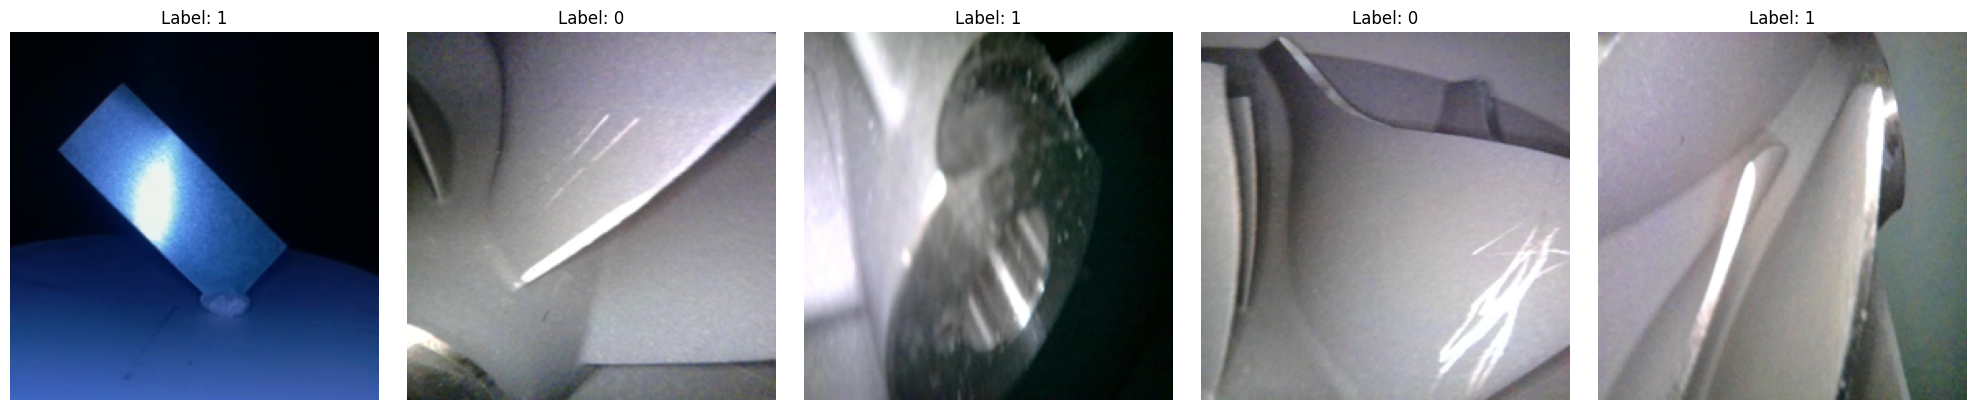

Visualizing 5 random samples from the validation dataset:


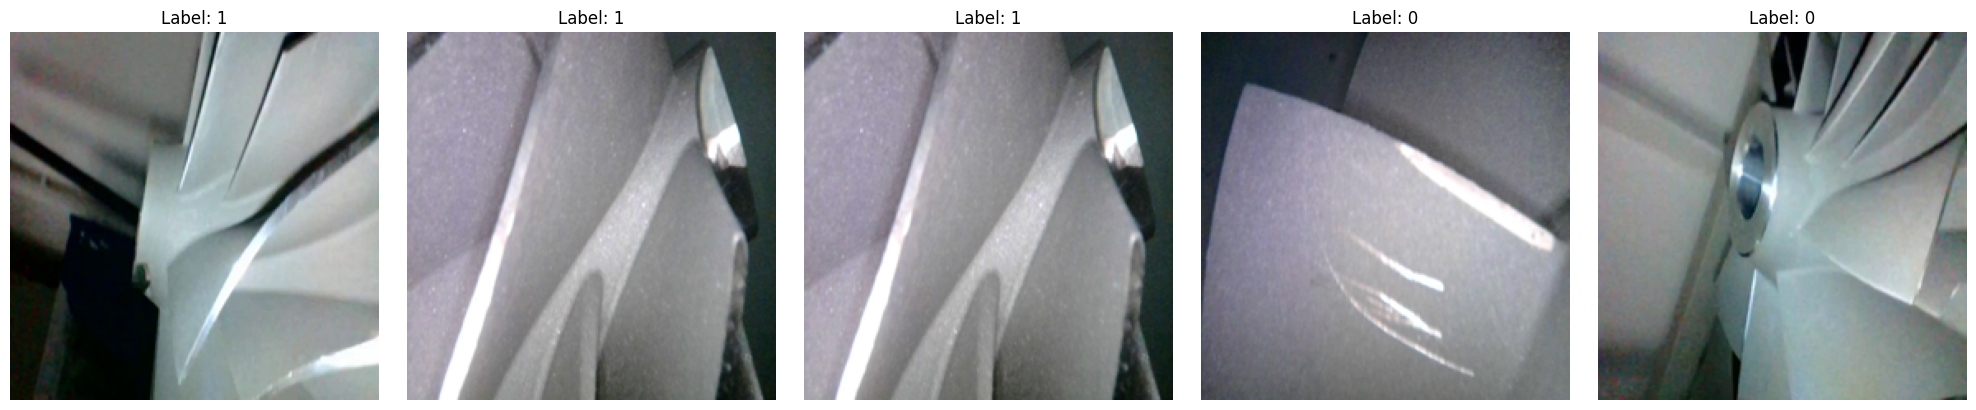

In [14]:
#import matplotlib.pyplot as plt

# Generate data and labels for training and validation
train_data, train_labels, train_missing_labels, train_label_contents = generate_data_and_labels(train_image_files, train_images_path, train_labels_path)
val_data, val_labels, val_missing_labels, val_label_contents = generate_data_and_labels(val_image_files, val_images_path, val_labels_path)

# Print missing labels
if train_missing_labels:
    print(f"Missing training labels for the following files: {train_missing_labels}")
if val_missing_labels:
    print(f"Missing validation labels for the following files: {val_missing_labels}")

# Print class distribution
print(f"Training class distribution:\n{pd.Series(train_labels).value_counts()}")
print(f"Validation class distribution:\n{pd.Series(val_labels).value_counts()}")

# Print dataset shapes
print(f"Training data shape: {train_data.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Validation labels shape: {val_labels.shape}")

# Displaying the label contents to verify correct labeling
print("Displaying the content of some label files:")
for i in range(5):
    image_file, label_file, label_content = train_label_contents[i]
    print(f"Image file: {image_file}, Label file: {label_file}, Content: {label_content}")

# Visualize some images with their labels
num_samples = 5

print(f"Visualizing {num_samples} random samples from the training dataset:")
fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
for i, ax in enumerate(axes):
    index = np.random.choice(len(train_data))
    ax.imshow(train_data[index])
    ax.set_title(f"Label: {train_labels[index]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

print(f"Visualizing {num_samples} random samples from the validation dataset:")
fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
for i, ax in enumerate(axes):
    index = np.random.choice(len(val_data))
    ax.imshow(val_data[index])
    ax.set_title(f"Label: {val_labels[index]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [15]:
# Generate data and labels for training and validation
train_data, train_labels, train_missing_labels, train_label_contents = generate_data_and_labels(train_image_files, train_images_path, train_labels_path)
val_data, val_labels, val_missing_labels, val_label_contents = generate_data_and_labels(val_image_files, val_images_path, val_labels_path)


In [16]:
# Convert labels to categorical format
train_labels_categorical = to_categorical(train_labels, num_classes=2)
val_labels_categorical = to_categorical(val_labels, num_classes=2)


In [19]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Define a simple CNN model
model = Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # For binary classification, 2 output neurons
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:
# Train the model
history = model.fit(train_data, train_labels_categorical, epochs=10, batch_size=32, validation_data=(val_data, val_labels_categorical))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5080 - loss: 4.1986 - val_accuracy: 0.6346 - val_loss: 0.6868
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5592 - loss: 0.7184 - val_accuracy: 0.3654 - val_loss: 0.8491
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5548 - loss: 0.7144 - val_accuracy: 0.7692 - val_loss: 0.5581
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8311 - loss: 0.4918 - val_accuracy: 0.8462 - val_loss: 0.4801
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8747 - loss: 0.3795 - val_accuracy: 0.7308 - val_loss: 0.5142
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8301 - loss: 0.3421 - val_accuracy: 0.8654 - val_loss: 0.4405
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9357 - loss: 0.2137 - val_accuracy: 0.8269 - val_loss: 0.7963
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9787 - loss: 0.1227 - val_accuracy: 0.7885 - val_loss: 1.8120
Epoch 9/

In [21]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_data, val_labels_categorical)
print(f'Validation accuracy: {val_accuracy:.4f}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step - accuracy: 0.8894 - loss: 1.5863
Validation accuracy: 0.8654


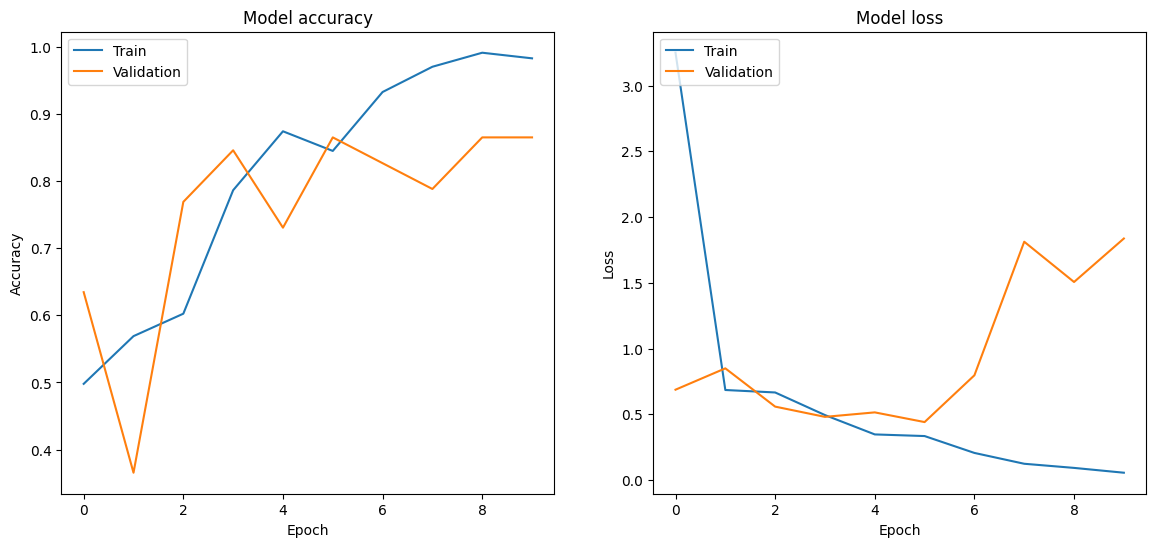

In [23]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 322ms/step


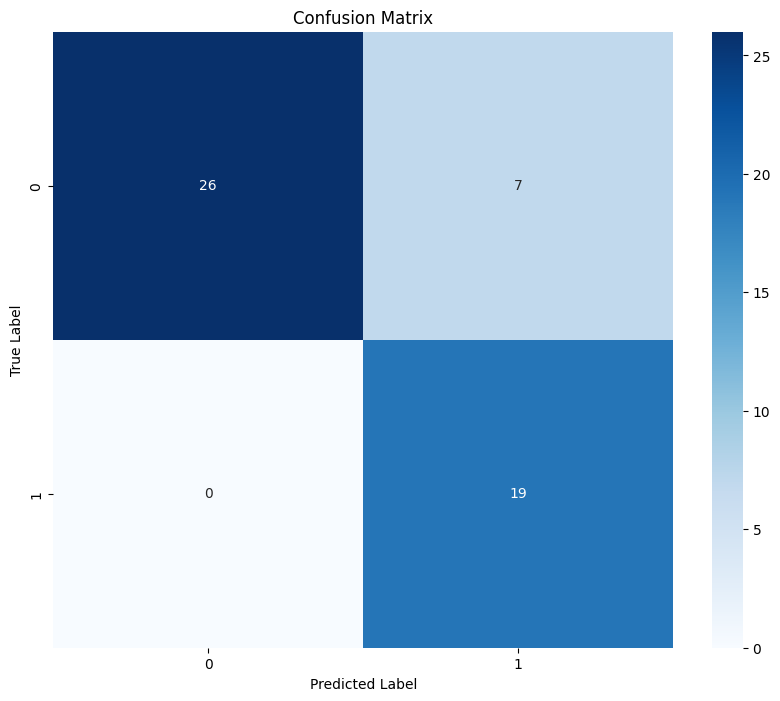

Classification Report
              precision    recall  f1-score   support

     Class 0       1.00      0.79      0.88        33
     Class 1       0.73      1.00      0.84        19

    accuracy                           0.87        52
   macro avg       0.87      0.89      0.86        52
weighted avg       0.90      0.87      0.87        52



In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the values from the validation dataset
y_pred = model.predict(val_data)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert validation observations to one hot vectors
y_true = np.argmax(val_labels_categorical, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report')
print(classification_report(y_true, y_pred_classes, target_names=['Class 0', 'Class 1']))
